# Name: Ji WEI
# June 6th, 2017
# 3. I use Random Forest method from Scikit learn library of Python to classfiy records.
# 4. AUC = 0.83
# 5. Because the data "outcome" is unbalanced, I use down-sampling methods to increase the accuracy of the model.

In [9]:
import os

import numpy as np
import pandas as pd
import statsmodels
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set(context="paper", font="monospace")

In [2]:
df = pd.read_csv('train.csv')
df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...
9995,41,0.004225,desktop,M,0,64489,2,3,8,0
9996,50,0.004751,other,F,0,88643,1,3,0,0
9997,60,0.003804,other,M,0,87870,2,2,9,0
9998,18,0.003838,laptop,M,0,56468,2,2,0,0


In [3]:
print(df.shape)
print (sum([True for idx,row in df.iterrows() if any(row.isnull())]))
null_data = df[df.isnull().any(axis=1)]
null_data
#Dig into numeric variables, find the missing value.

(10000, 10)
269


,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
15,32,0.003519,Android,NaN,0,71909,1,3,8,0
38,54,0.005529,iPhone,NaN,0,87122,2,3,8,0
91,35,0.005510,iPhone,NaN,0,52343,1,3,3,0
113,41,0.004282,Android,NaN,0,72978,2,2,11,0
122,34,0.005518,iPhone,NaN,0,50425,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...
9598,58,0.003698,Android,NaN,1,84495,2,1,17,0
9661,21,0.003397,laptop,NaN,1,34907,2,3,0,0
9745,55,0.003876,Android,NaN,1,69374,1,3,15,0
9886,41,0.004150,Android,NaN,1,46060,2,2,2,0


In [4]:
df.outcome.value_counts()

0    9018
1     982
Name: outcome, dtype: int64

In [5]:
df.gender.value_counts(dropna = False)

F      4970
M      4761
NaN     269
Name: gender, dtype: int64

In [6]:
pd.crosstab(df['outcome'], df['gender'])
df.dropna(subset= ['gender'], inplace = True)
df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...
9994,58,0.003941,Android,M,0,95916,1,1,18,0
9995,41,0.004225,desktop,M,0,64489,2,3,8,0
9996,50,0.004751,other,F,0,88643,1,3,0,0
9997,60,0.003804,other,M,0,87870,2,2,9,0


In [7]:
df.device_type.value_counts(dropna = False)

desktop    1988
Android    1980
other      1936
laptop     1922
iPhone     1905
Name: device_type, dtype: int64

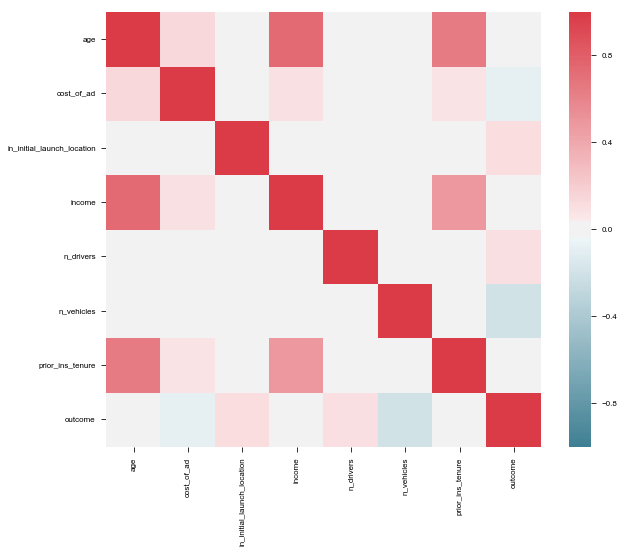

In [21]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),\
            cmap=sns.diverging_palette(220, 10, as_cmap=True),\
            square=True, ax=ax)


In [372]:
device_df = pd.get_dummies(df.device_type, prefix = 'device')
gender_df = pd.get_dummies(df.gender, prefix = 'gender')
df = df.join([device_df , gender_df])

In [373]:
df.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome', 'device_Android', 'device_desktop',
       'device_iPhone', 'device_laptop', 'device_other', 'gender_F',
       'gender_M'],
      dtype='object')

In [394]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .8
train, tests = df[df['is_train']==True], df[df['is_train']==False]


In [395]:
columns = ['age','cost_of_ad','gender_F','gender_M','in_initial_launch_location','income','device_Android',\
        'device_iPhone', 'device_laptop','device_other','n_vehicles','prior_ins_tenure']

In [396]:
train.outcome.value_counts()

0    7081
1     792
Name: outcome, dtype: int64

In [397]:
train_0 = train[train.outcome == 0].sample(792)
train_1 = train[train.outcome == 1].sample(792)
train = pd.concat([train_0, train_1])
train.outcome.value_counts()

1    792
0    792
Name: outcome, dtype: int64

In [398]:
print (tests.shape)
print (train.shape)

(1858, 18)
(1584, 18)


In [399]:
train_X = train[columns]
train_y = train['outcome']

In [400]:
rfc = RandomForestClassifier(n_estimators = 80,
                             n_jobs=3,
                             criterion = "gini",
                             max_features = 12,
                             max_depth = 8,
                             bootstrap = True
                             ,random_state = 123)
rfc.fit(train_X, train_y)
print (rfc.score(train_X, train_y))

0.900883838384


In [401]:
tests_X = tests[columns]
tests_y = tests['outcome']
results = rfc.predict(tests_X)
tests['predictions'] = results
probs = rfc.predict_proba(tests_X)
print (probs.mean())

0.5


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [402]:
print (pd.crosstab(tests_y, results, rownames=['actual'], colnames=['preds']))
print(rfc.score(tests_X, tests_y))

preds      0    1
actual           
0       1252  425
1         44  137
0.747578040904


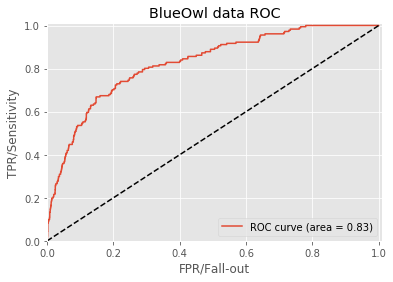

In [403]:
p_hat = rfc.predict_proba(tests_X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(tests_y, p_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("BlueOwl data ROC")
plt.legend(loc = 'lower right')

In [433]:
dft = pd.read_csv('test.csv')
dft

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3
...,...,...,...,...,...,...,...,...,...
9995,50,0.005927,iPhone,M,1,78899,2,3,14
9996,24,0.005138,Android,F,1,26703,1,3,2
9997,40,0.006225,iPhone,F,1,62402,1,2,3
9998,38,0.004601,other,F,1,58663,1,1,9


In [434]:
dft.gender.value_counts(dropna = False)
dft.dropna(subset= ['gender'], inplace = True)
dft

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3
...,...,...,...,...,...,...,...,...,...
9995,50,0.005927,iPhone,M,1,78899,2,3,14
9996,24,0.005138,Android,F,1,26703,1,3,2
9997,40,0.006225,iPhone,F,1,62402,1,2,3
9998,38,0.004601,other,F,1,58663,1,1,9


In [435]:
device_dft = pd.get_dummies(dft.device_type, prefix = 'device')
gender_dft = pd.get_dummies(dft.gender, prefix = 'gender')
dft1 = dft.join([device_dft , gender_dft])

In [436]:
test_X = dft1[columns]

In [438]:
pred = rfc.predict(test_X)
dft['pred_outcome'] = pred


In [439]:
dft

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,pred_outcome
0,34,0.005134,Android,F,1,40376,1,3,7,0
1,53,0.005223,desktop,F,1,84511,1,1,11,1
2,46,0.004939,laptop,F,0,79322,1,1,4,0
3,36,0.004924,Android,F,0,63295,1,2,0,0
4,28,0.005146,other,F,1,36170,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...
9995,50,0.005927,iPhone,M,1,78899,2,3,14,0
9996,24,0.005138,Android,F,1,26703,1,3,2,1
9997,40,0.006225,iPhone,F,1,62402,1,2,3,0
9998,38,0.004601,other,F,1,58663,1,1,9,0


In [440]:
dft.to_csv('outputtest.csv')